In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression , LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [154]:
df = pd.read_csv('stats.csv')

In [155]:
df=df.drop(columns='Unnamed: 23')

In [156]:
df.head(5).T

,0,1,2,3,4
last_name,Pujols,Cabrera,Molina,Cano,Suzuki
first_name,Albert,Miguel,Yadier,Robinson,Kurt
player_id,405395,408234,425877,429664,435559
year,2022,2022,2022,2022,2022
player_age,42,39,39,39,38
b_ab,185,335,169,100,116
b_total_pa,212,368,174,104,130
b_total_hits,46,89,36,15,22
b_single,27,76,29,13,15
b_double,9,9,5,1,4


In [157]:
df.columns = ['last','first','id','year','age','ab','pa','hits','single','double','triple','hr','so','walk','ops','rbi','lob','tb','pitches_faced','pull','center','oppo','batted']

In [158]:
df['name'] = df['first'].map(str) + ' ' + df['last'].map(str)

In [159]:
df2 = pd.read_csv('value.csv')

In [160]:
df2.columns = ['name','team','raa','waa','owar','salary','playerid','year']

In [161]:
df2 = df2.drop(index=0)

In [162]:
df2.sort_values(by=['name','year'])

,name,team,raa,waa,owar,salary,playerid,year
744,A.J. Alexy,TEX,0,NaN,NaN,NaN,alexyaj01,2021
5164,A.J. Cole,2TM,2,0.2,0.2,"$555,300",coleaj01,2018
3767,A.J. Cole,CLE,0,NaN,NaN,NaN,coleaj01,2019
2454,A.J. Cole,TOR,0,NaN,NaN,"$100,000",coleaj01,2020
982,A.J. Cole,TOR,0,0,0,"$1,000,000",coleaj01,2021
...,...,...,...,...,...,...,...,...
5984,Zac Rosscup,LAD,0,0,0,NaN,rosscza01,2018
4602,Zac Rosscup,3TM,0,0,0,"$610,000",rosscza01,2019
1890,Zac Rosscup,COL,0,0,0,NaN,rosscza01,2021
3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
df2

,name,team,raa,waa,owar,salary,playerid,year
1,Aaron Judge,NYY,53,5.5,6.9,"$19,000,000",judgeaa01,2022
2,Paul Goldschmidt,STL,45,4.6,6,"$26,000,000",goldspa01,2022
3,Austin Riley,ATL,30,3.2,4.9,NaN,rileyau01,2022
4,Manny Machado,SDP,32,3.3,4.9,"$32,000,000",machama01,2022
5,Juan Soto*,2TM,28,3,4.7,"$17,100,000",sotoju01,2022
...,...,...,...,...,...,...,...,...
6298,Bradley Zimmer*,CLE,-3,-0.3,0.1,"$551,200",zimmebr01,2018
6299,Ryan Zimmerman,WSN,7,0.6,1.2,"$14,000,000",zimmery01,2018
6300,Jordan Zimmermann,DET,0,0,0,"$24,000,000",zimmejo02,2018
6301,Ben Zobrist#,CHC,20,1.9,2.7,"$16,500,000",zobribe01,2018


In [164]:
df2.name = df2.name.str.strip(' ').str.strip('*')
df2.name = df2.name.str.replace('.','')
df2.name = df2.name.str.replace('\xa0',' ')

In [165]:
df = df.sort_values(by=['name','year']).reset_index()

In [166]:
df.sort_values(by=['name','year'])

,index,last,first,id,year,age,ab,pa,hits,single,...,ops,rbi,lob,tb,pitches_faced,pull,center,oppo,batted,name
0,1927,Ellis,A.J.,454560,2018,37,151,183,41,32,...,0.716,15,65,52,793,37.8,36.1,26.1,119,A.J. Ellis
1,2195,Pollock,AJ,572041,2018,30,413,460,106,59,...,0.799,65,178,200,1720,44.5,35.8,19.6,321,AJ Pollock
2,2841,Pollock,AJ,572041,2019,31,308,342,82,51,...,0.795,47,136,144,1250,42.0,39.5,18.5,238,AJ Pollock
3,757,Pollock,AJ,572041,2020,32,196,210,54,29,...,0.881,34,76,111,746,43.1,30.1,26.8,153,AJ Pollock
4,1310,Pollock,AJ,572041,2021,33,384,422,114,65,...,0.892,69,163,206,1465,38.2,39.2,22.5,306,AJ Pollock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,2566,Greinke,Zack,425844,2019,35,50,56,14,6,...,0.866,8,17,29,177,35.7,33.3,31.0,42,Zack Greinke
3285,1818,Short,Zack,670097,2021,26,156,184,22,12,...,0.521,20,87,44,801,39.8,33.0,27.2,103,Zack Short
3286,2154,Wheeler,Zack,554430,2018,28,56,60,11,9,...,0.415,4,27,13,194,35.9,35.9,28.2,39,Zack Wheeler
3287,2807,Wheeler,Zack,554430,2019,29,57,64,12,9,...,0.548,6,23,17,215,26.8,43.9,29.3,41,Zack Wheeler


In [167]:
df2.year = df2.year.replace(np.NaN,0)
df2.year = df2.year.astype('int64')

In [168]:
df2 = df2.sort_values(by=['name','year']).reset_index()

In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6302 non-null   int64 
 1   name      6300 non-null   object
 2   team      6300 non-null   object
 3   raa       6300 non-null   object
 4   waa       5262 non-null   object
 5   owar      5247 non-null   object
 6   salary    3023 non-null   object
 7   playerid  6300 non-null   object
 8   year      6302 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 443.2+ KB


In [170]:
df.name=df.name.str.strip(' ').str.replace('.','')

In [171]:
players = df.name.tolist()

In [172]:
df2[df2.name.isin(players)]

,index,name,team,raa,waa,owar,salary,playerid,year
5,5274,AJ Ellis,SDP,-2,-0.3,0.8,"$1,250,000",ellisaj01,2018
10,5883,AJ Pollock,ARI,9,0.7,2.1,"$7,750,000",polloaj01,2018
11,4498,AJ Pollock,LAD,-9,-1,1.3,"$4,000,000",polloaj01,2019
12,3143,AJ Pollock,LAD,2,0.2,1.2,"$15,000,000",polloaj01,2020
13,1783,AJ Pollock,LAD,17,1.6,2.9,"$18,000,000",polloaj01,2021
...,...,...,...,...,...,...,...,...,...
6294,395,Zack Short,DET,1,0.1,0,NaN,shortza01,2022
6296,6250,Zack Wheeler,NYM,2,0.2,0.3,"$1,900,000",wheelza01,2018
6297,4866,Zack Wheeler,NYM,7,0.6,0.6,"$5,975,000",wheelza01,2019
6298,3463,Zack Wheeler,PHI,0,NaN,NaN,"$21,500,000",wheelza01,2020


In [173]:
df = pd.merge(df,df2,on=['name','year'], how='left')

In [174]:
df.salary = df.salary.str.strip('$').str.replace(',','')

In [175]:
df['impact'] = round(((df.single+(df.double*2)+(df.triple*3)+(df.hr*4)+df.walk+df.rbi)-(df.so+df.lob))/(df.pa),3)

In [176]:
df['ppa'] = df.pitches_faced/df.pa

In [177]:

df = df.drop(columns=['hits','ab','pa','single','double','triple','hr','walk','rbi','so','lob'])

In [178]:
df=df.drop(columns='index_y')

In [179]:

df= df.dropna(how='any',subset=['team','raa','waa','owar'])

In [180]:
cols = ['raa','waa','owar','salary']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [181]:
train, validate = train_test_split(df, random_state=123)
train, test = train_test_split(train, random_state=123)

In [182]:
med_sal = train.salary.median()
train.salary = train.salary.replace(np.NaN,med_sal)
validate.salary = validate.salary.replace(np.NaN,med_sal)
test.salary = test.salary.replace(np.NaN,med_sal)

In [183]:
train.head().T

,2389,3134,1585,2564,3049
index_x,615,2190,739,3226,2489
last,Markakis,Myers,Schoop,Laureano,Mahle
first,Nick,Wil,Jonathan,Ramon,Tyler
id,455976,571976,570731,657656,641816
year,2020,2018,2020,2019,2018
age,36,27,28,24,23
ops,0.704,0.763,0.797,0.86,0.285
tb,51,139,77,226,4
pitches_faced,550,1419,624,1954,122
pull,31.8,46.6,42.4,39.4,18.2


In [184]:
train.sort_values(by=['impact'],ascending=False)

,index_x,last,first,id,year,age,ops,tb,pitches_faced,pull,...,batted,name,team,raa,waa,owar,salary,playerid,impact,ppa
2394,452,Maton,Nick,665155,2022,25,1.687,15,49,70.0,...,10,Nick Maton,PHI,4,0.4,0.5,3200000.0,matonni01,1.400,3.266667
2339,2555,Straw,Myles,664702,2018,23,1.067,6,40,0.0,...,9,Myles Straw,HOU,2,0.2,0.2,3200000.0,strawmy01,0.800,4.000000
2792,1774,Beer,Seth,666179,2021,24,1.389,8,36,50.0,...,6,Seth Beer,ARI,1,0.1,0.2,3200000.0,beerse01,0.600,3.600000
1746,1079,Soto,Juan,665742,2020,21,1.185,107,827,27.0,...,126,Juan Soto,WSN,18,1.7,3.2,3200000.0,sotoju01,0.526,4.219388
3077,3058,Taylor,Tyrone,621438,2019,25,1.100,6,43,44.4,...,9,Tyrone Taylor,MIL,1,0.0,0.2,3200000.0,tayloty01,0.500,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1490,Mills,Alec,621219,2021,29,0.090,2,149,10.0,...,10,Alec Mills,CHC,-3,-0.3,-0.3,3200000.0,millsal02,-1.250,4.138889
2754,1618,Alcantara,Sandy,645261,2021,25,0.145,3,268,26.7,...,15,Sandy Alcantara,MIA,-2,-0.3,-0.2,3200000.0,alcansa01,-1.250,4.187500
3045,1646,Gilbert,Tyler,656457,2021,27,0.000,0,41,0.0,...,5,Tyler Gilbert,ARI,-1,-0.1,-0.1,3200000.0,gilbety01,-1.273,3.727273
585,1193,Anderson,Chase,502624,2021,33,0.000,0,43,25.0,...,8,Chase Anderson,PHI,-2,-0.2,-0.2,4000000.0,anderch01,-1.286,3.071429


<AxesSubplot:xlabel='ops', ylabel='impact'>

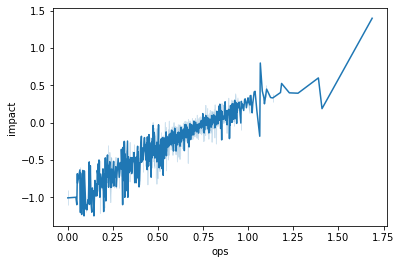

In [185]:
sns.lineplot(x='ops',y='impact', data= train)

<AxesSubplot:xlabel='ppa', ylabel='impact'>

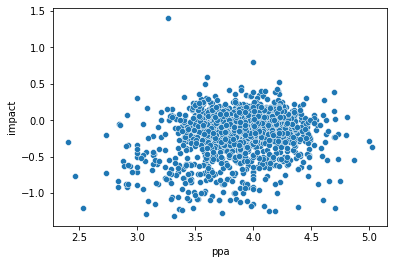

In [186]:
sns.scatterplot(data=train, x='ppa',y='impact')

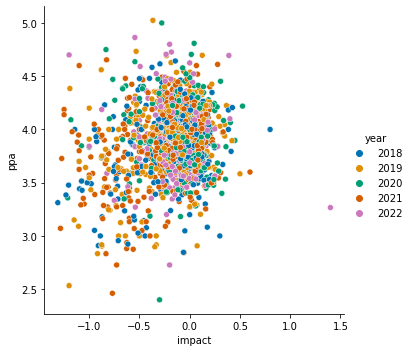

In [187]:
sns.relplot(data=train, x='impact', y='ppa', hue='year', palette='colorblind')

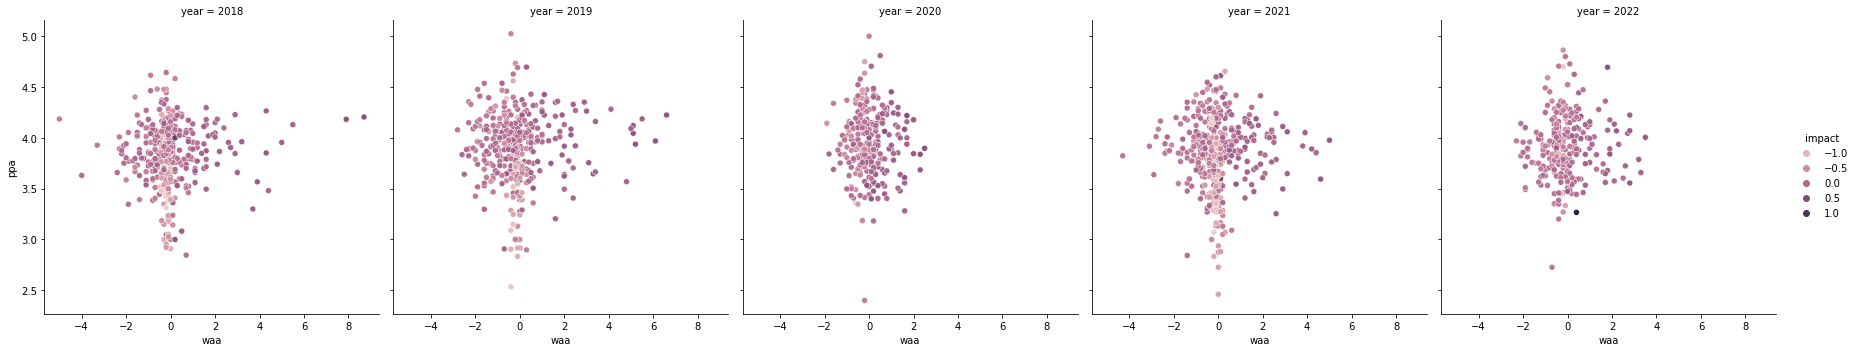

In [188]:
sns.relplot(data=train, x='waa', y='ppa', col='year', hue='impact')

In [189]:
#sns.pairplot(train.drop(columns=['last','first','id','year','single','double','triple','hr']),corner=True)

In [190]:
continuous= train.drop(columns=['index_x','last','first','id','name','team','playerid']).columns.tolist()

In [191]:
cols = ['raa','waa','owar','salary']
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce')

In [192]:
train.isna().sum()

index_x          0
last             0
first            0
id               0
year             0
age              0
ops              0
tb               0
pitches_faced    0
pull             0
center           0
oppo             0
batted           0
name             0
team             0
raa              0
waa              0
owar             0
salary           0
playerid         0
impact           0
ppa              0
dtype: int64

In [193]:
train = train.dropna()
validate = validate.dropna()
test = test.dropna()

In [194]:
drop=train.drop(columns=['index_x','last','first','id','name','team','playerid','owar','year','pull','center','oppo']).columns.tolist()

scale = RobustScaler()
scale.fit(train.drop(columns=['index_x','last','first','id','name','team','playerid','owar','year','pull','center','oppo']))

def scale_and_concat(df):
    scaled_column_names = ['scaled_' + i for i in drop]
    scaled_array = scale.transform(df[drop])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)
train = scale_and_concat(train)

In [195]:
validate = scale_and_concat(validate)
test = scale_and_concat(test)

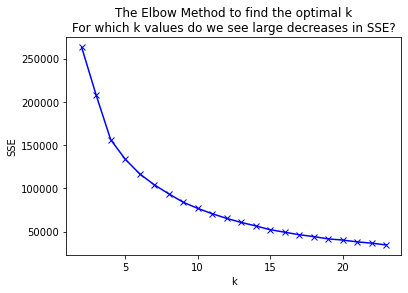

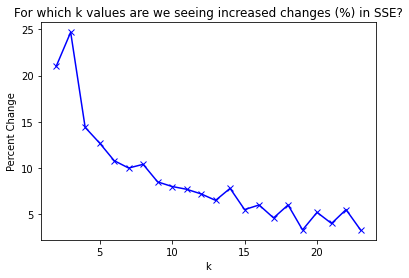

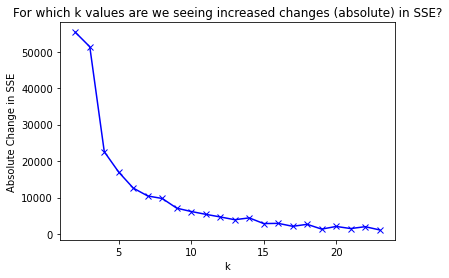

In [196]:
cluster_vars=['pull','center','oppo']
cluster_name = 'tendency'
k_range = range(2,25)

def find_k(train_scaled, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

find_k(train,cluster_vars,k_range)   


In [197]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(train[cluster_vars])
train["tendency"] = kmeans.predict(train[cluster_vars])
validate["tendency"] = kmeans.predict(validate[cluster_vars])
test["tendency"] = kmeans.predict(test[cluster_vars])

train.head()

,index_x,last,first,id,year,age,ops,tb,pitches_faced,pull,...,scaled_ops,scaled_tb,scaled_pitches_faced,scaled_batted,scaled_raa,scaled_waa,scaled_salary,scaled_impact,scaled_ppa,tendency
2389,615,Markakis,Nick,455976,2020,36,0.704,51,550,31.8,...,0.125541,-0.035714,-0.088185,0.005,-0.666667,-0.555556,1.333333,0.022581,-0.015725,1
3134,2190,Myers,Wil,571976,2018,27,0.763,139,1419,46.6,...,0.380952,0.750000,0.655822,0.565,1.333333,1.222222,2.166667,0.354839,0.577180,0
1585,739,Schoop,Jonathan,570731,2020,28,0.797,77,624,42.4,...,0.528139,0.196429,-0.024829,0.095,0.888889,0.888889,4.833333,0.545161,-0.957293,0
2564,3226,Laureano,Ramon,657656,2019,24,0.860,226,1954,39.4,...,0.800866,1.526786,1.113870,1.070,2.000000,2.111111,-4.404167,0.458065,0.389872,0
3049,2489,Mahle,Tyler,641816,2018,23,0.285,4,122,18.2,...,-1.688312,-0.455357,-0.454623,-0.420,0.111111,0.111111,-4.425000,-1.532258,-0.799703,2


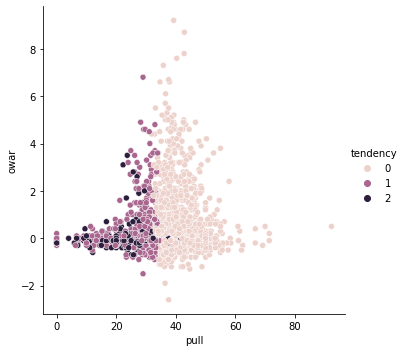

In [198]:
sns.relplot(data=train,x='pull',y='owar',hue='tendency')

<AxesSubplot:xlabel='tendency', ylabel='owar'>

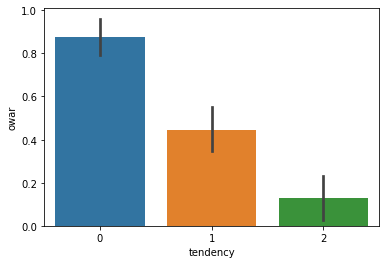

In [199]:
sns.barplot(data=train,x='tendency',y='owar')

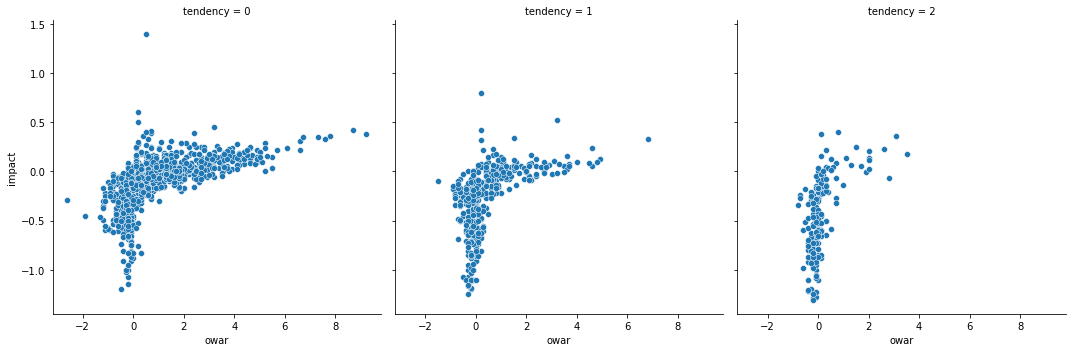

In [200]:
sns.relplot(data=train,x='owar',y='impact', col='tendency')


In [201]:
train = train.drop(columns=cluster_vars)

In [202]:
cluster_vars=['scaled_raa','scaled_waa','scaled_ops']
cluster_name = 'production'
k_range = range(2,25)

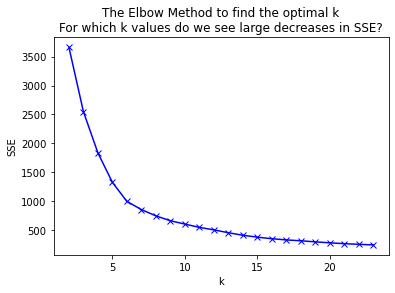

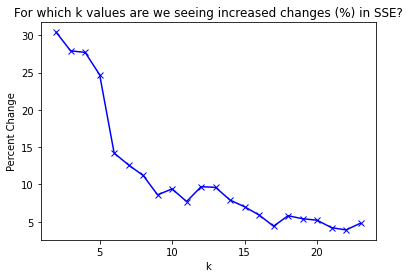

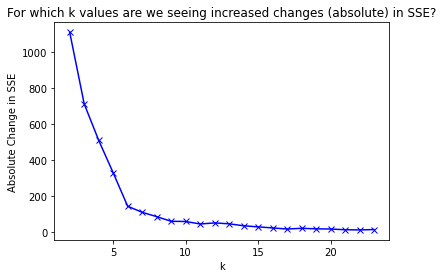

In [203]:
find_k(train,cluster_vars,k_range) 

In [204]:
kmeans = KMeans(n_clusters = 6, random_state=123)
kmeans.fit(train[cluster_vars])
train["production"] = kmeans.predict(train[cluster_vars])
validate["production"] = kmeans.predict(validate[cluster_vars])
test["production"] = kmeans.predict(test[cluster_vars])


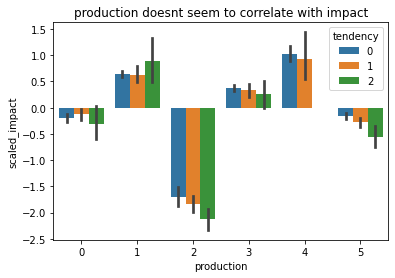

In [205]:
sns.barplot(data=train, y='scaled_impact',x='production',hue='tendency')
plt.title('production doesnt seem to correlate with impact')
plt.show()

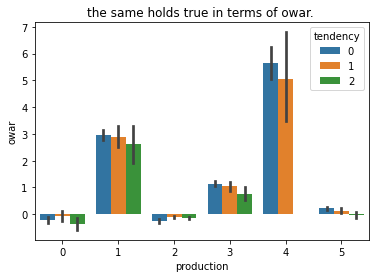

In [206]:
sns.barplot(data=train, y='owar',x='production',hue='tendency')
plt.title('the same holds true in terms of owar. ')
plt.show()

In [207]:
train= train.drop(columns=cluster_vars)

In [208]:
train = train.drop(columns=drop)
validate = validate.drop(columns=drop)
test = test.drop(columns=drop)

In [209]:
x_train=train.drop(columns='owar')
y_train= train.owar

x_validate=validate.drop(columns='owar')
y_validate= validate.owar

x_test=test.drop(columns='owar')
y_test= test.owar

In [210]:
x_train_scaled = x_train.drop(columns=['index_x','last','first','id','name','team','playerid'])

In [211]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=7)

# fit the data using RFE
rfe.fit(x_train_scaled,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = x_train_scaled.iloc[:,feature_mask].columns.tolist()
rfe_feature

['year',
 'scaled_tb',
 'scaled_pitches_faced',
 'scaled_batted',
 'scaled_impact',
 'scaled_ppa',
 'tendency']

In [212]:
linear_train = train[rfe_feature]
linear_validate= validate[rfe_feature]
linear_test = test[rfe_feature]

In [213]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)
y_train.columns = ['owar']
y_validate.columns = ['owar']

y_train['owar_pred_mean']=y_train.owar.mean()
y_train['owar_pred_median']=y_train.owar.median()
y_validate['owar_pred_mean']=y_train.owar.mean()
y_validate['owar_pred_median']=y_train.owar.median()

In [214]:
rmse_train = mean_squared_error(y_train.owar, y_train.owar_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.owar, y_validate.owar_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of owar_pred_median
rmse_train = mean_squared_error(y_train.owar, y_train.owar_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.owar, y_validate.owar_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.34 
Validate/Out-of-Sample:  1.43
RMSE using Median
Train/In-Sample:  1.42 
Validate/Out-of-Sample:  1.53


In [215]:
lm = LinearRegression(normalize=True)
lm.fit(linear_train, y_train.owar)
y_train['lm_pred'] = lm.predict(linear_train)
y_validate['lm_pred'] = lm.predict(linear_validate)
rmse_train = mean_squared_error(y_train.owar, y_train.lm_pred)**(1/2)
rmse_validate = mean_squared_error(y_validate.owar, y_validate.lm_pred)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  0.64 
Validate/Out-of-Sample:  0.62


In [216]:
lasso = LassoLars(alpha=1.0)
lasso.fit(linear_train, y_train.owar)
y_train['lasso_pred'] = lasso.predict(linear_train)
y_validate['lasso_pred'] = lasso.predict(linear_validate)
rmse_train = mean_squared_error(y_train.owar, y_train.lasso_pred)**(1/2)
rmse_validate = mean_squared_error(y_validate.owar, y_validate.lasso_pred)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  1.34 
Validate/Out-of-Sample:  1.43


In [217]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_train_poly2 = pf.fit_transform(linear_train)

# transform X_validate_scaled & X_test_scaled
x_validate_poly2 = pf.transform(linear_validate)
x_test_poly2 = pf.transform(linear_test)


In [218]:
lm2 = LinearRegression(normalize=True)
lm2.fit(x_train_poly2, y_train.owar)
y_train['lm2_pred'] = lm2.predict(x_train_poly2)
y_validate['lm2_pred'] = lm2.predict(x_validate_poly2)
rmse_train = mean_squared_error(y_train.owar, y_train.lm2_pred)**(1/2)
rmse_validate = mean_squared_error(y_validate.owar, y_validate.lm2_pred)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.51 
Validate/Out-of-Sample:  0.55


In [219]:
y_test['lm2_pred'] = lm2.predict(x_test_poly2)
rmse_test = mean_squared_error(y_test.owar, y_test.lm2_pred)**(1/2)
print("RMSE using Polynomial \nTest/Out-of-sample; ", round(rmse_test,2))

RMSE using Polynomial 
Test/Out-of-sample;  0.61
